Data Analysis and Data PreProcessing


ANALYZED ATTRIBUTE NAME: Buying Price
-- COUNT OF RECORDS: 1728
-- COUNT OF MISSING VALUES: 0
-- RATIO OF MISSING VALUES: 0.0 %
-- CARDINALITY=COUNT OF UNIQUE VALUES: 4

ANALYZED ATTRIBUTE NAME: Maintenance Cost
-- COUNT OF RECORDS: 1728
-- COUNT OF MISSING VALUES: 0
-- RATIO OF MISSING VALUES: 0.0 %
-- CARDINALITY=COUNT OF UNIQUE VALUES: 4

ANALYZED ATTRIBUTE NAME: Number of Doors
-- COUNT OF RECORDS: 1728
-- COUNT OF MISSING VALUES: 0
-- RATIO OF MISSING VALUES: 0.0 %
-- CARDINALITY=COUNT OF UNIQUE VALUES: 4

ANALYZED ATTRIBUTE NAME: Person Capacity
-- COUNT OF RECORDS: 1728
-- COUNT OF MISSING VALUES: 0
-- RATIO OF MISSING VALUES: 0.0 %
-- CARDINALITY=COUNT OF UNIQUE VALUES: 3

ANALYZED ATTRIBUTE NAME: Size of Luggage Boot
-- COUNT OF RECORDS: 1728
-- COUNT OF MISSING VALUES: 0
-- RATIO OF MISSING VALUES: 0.0 %
-- CARDINALITY=COUNT OF UNIQUE VALUES: 3

ANALYZED ATTRIBUTE NAME: Safety
-- COUNT OF RECORDS: 1728
-- COUNT OF MISSING VALUES: 0
-- RATIO OF MISSING VALUES: 0.0 %
-- CARDIN

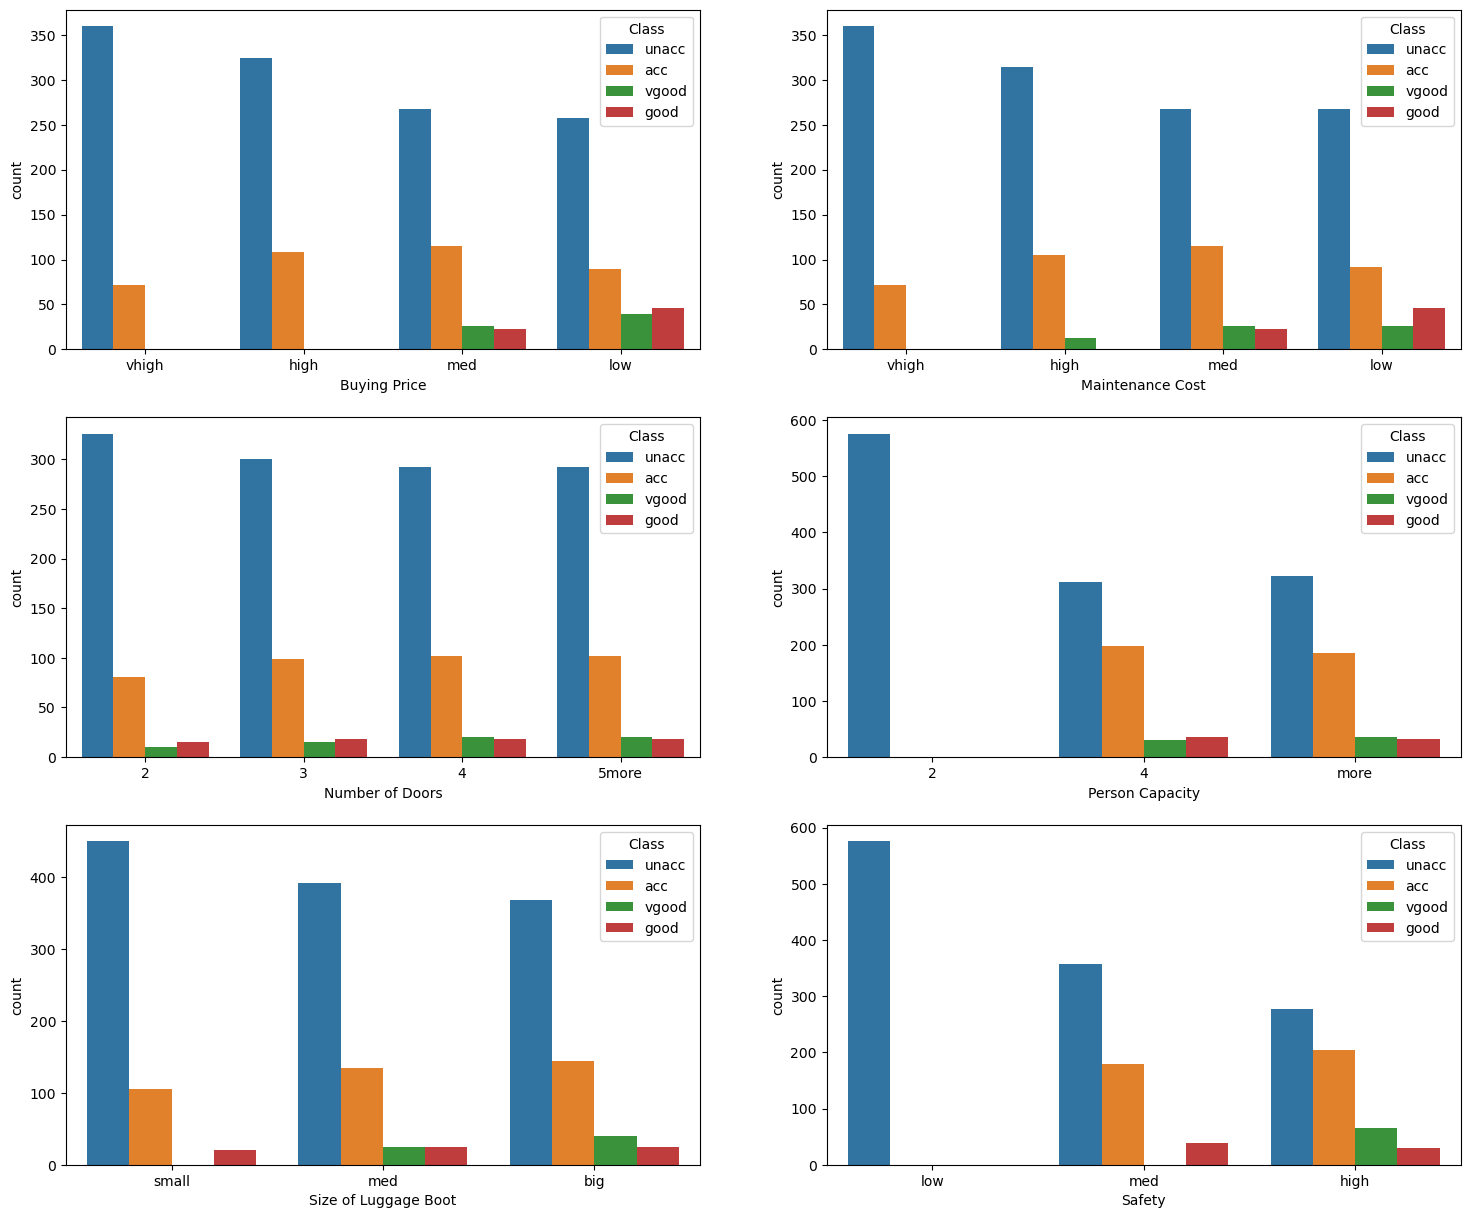

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col_names = ['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Person Capacity',
            'Size of Luggage Boot', 'Safety', 'Class']
df = pd.read_csv ('car_evaluation.csv', sep=',', names=col_names)
base_color = "blue"

#Checking the basics of the data
for (name, series) in df.items(): 
    print('\n'+"ANALYZED ATTRIBUTE NAME:", name)
    print("-- COUNT OF RECORDS:", df[name].size)
    print("-- COUNT OF MISSING VALUES:", sum(df[name].isnull().values.ravel()))
    print("-- RATIO OF MISSING VALUES:", sum(df[name].isnull().values.ravel()) / df[name].size*100, "%")
    print("-- CARDINALITY=COUNT OF UNIQUE VALUES:", df[name].unique().size)

#Checking null values 
print('\n'+"Checking Null Values:")
print(df.isnull().sum())

#Removed duplicates from all columns
df = df.drop_duplicates()

col_plot = ['Buying Price', 'Maintenance Cost', 'Number of Doors', 'Person Capacity',
            'Size of Luggage Boot', 'Safety']
#Using a count plot to investigate the data
plt.figure(figsize=(18,15))
for i, col in enumerate(col_plot, 1):
    plt.subplot(3, 2, i)
    shades = sns.light_palette(base_color, n_colors=6, reverse=True)
    sns.countplot(data=df, x=col, hue='Class')

Decision Tree Classifier (Entropy)

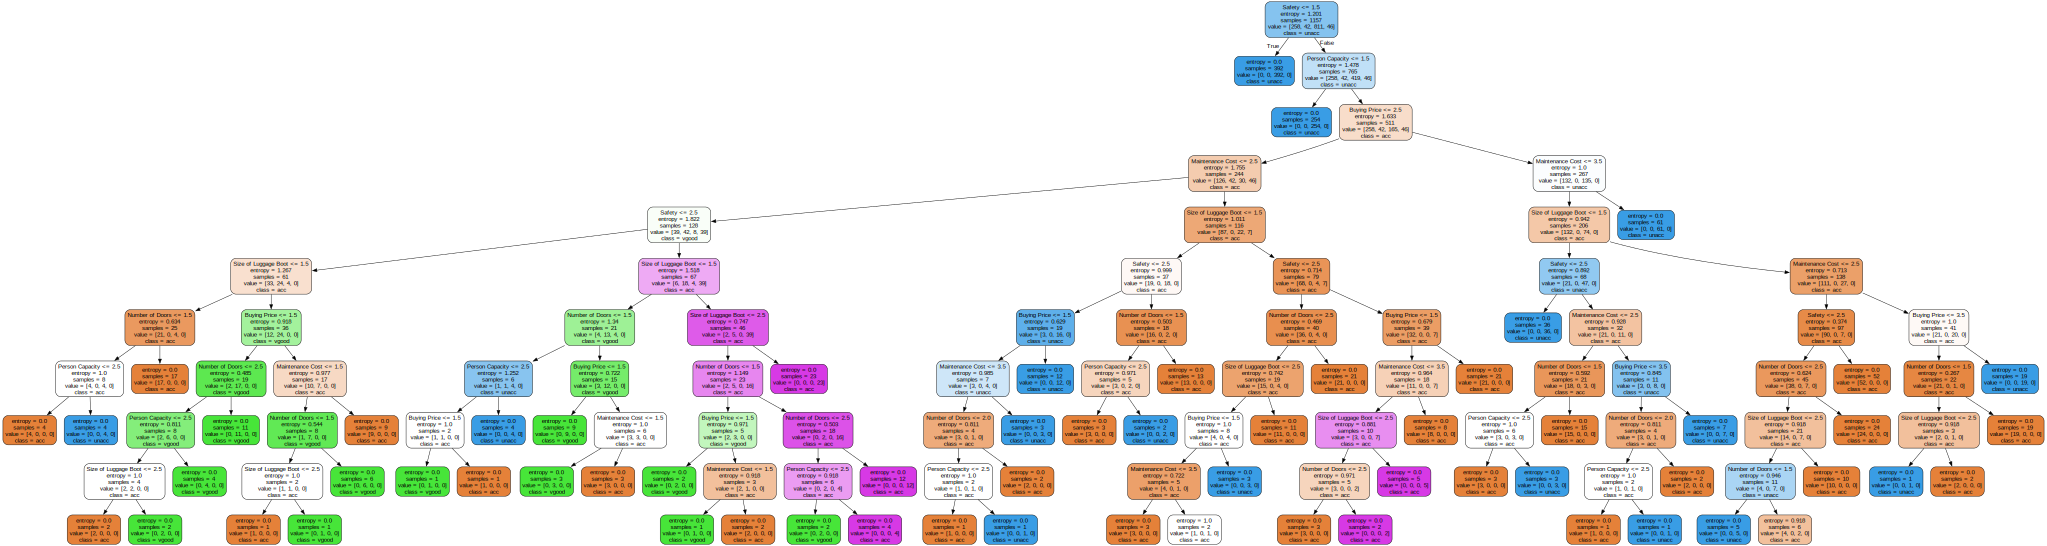

In [50]:
#Shows the Decision Tree classifier with criterion Entropy
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :6], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#Data PreProcessing
#Since the dataset has all categorical data values, we use an ordinal encoder to convert those values into numerical values
ordinal_mapping = [
    {'col': 'Buying Price', 'mapping': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}},
    {'col': 'Maintenance Cost', 'mapping': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}},
    {'col': 'Number of Doors', 'mapping': {'2': 1, '3': 2, '4': 3, '5more': 4}},
    {'col': 'Person Capacity', 'mapping': {'2': 1, '4': 2, 'more': 3}},
    {'col': 'Size of Luggage Boot', 'mapping': {'small': 1, 'med': 2, 'big': 3}},
    {'col': 'Safety', 'mapping': {'low': 1, 'med': 2, 'high': 3}}
]

import category_encoders as ce
encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
dct_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
dct_en = dct_en.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(dct_en, out_file='tree.dot',
            feature_names=X_train.columns,  
            class_names=y_train,  
            filled=True, rounded=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Data Evaluation for Decision Tree Classifer with criterion Entropy

Scores for Training and Testing with varying Tree Depths (Entropy):
    LevelLimit  Score for Training  Score for Testing
1          1.0            0.700951           0.698774
2          2.0            0.781331           0.770578
3          3.0            0.783924           0.807356
4          4.0            0.836646           0.837128
5          5.0            0.885048           0.847636
6          6.0            0.926534           0.894921
7          7.0            0.952463           0.914186
8          8.0            0.973207           0.954466
9          9.0            0.987035           0.964974
10        10.0            0.997407           0.970228

Classification Report for criterion Entropy:
              precision    recall  f1-score   support

         acc       0.94      0.92      0.93       126
        good       0.87      0.96      0.91        27
       unacc       0.98      0.99      0.99       399
       vgood       1.00      0.95      0.97        19

    accuracy        

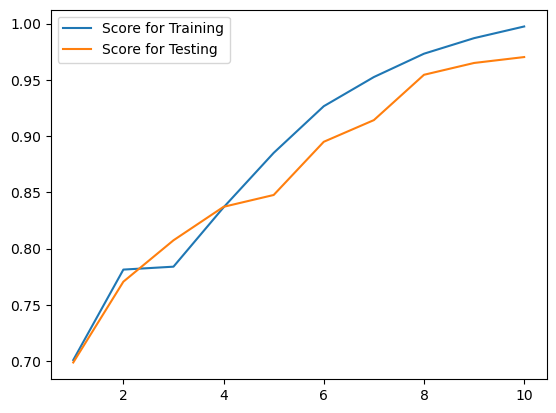

In [55]:
from sklearn.metrics import accuracy_score, classification_report

#To see if we are overtraining using 'entropy'/information gain
print("Scores for Training and Testing with varying Tree Depths (Entropy):")
resultsEntropy = pd.DataFrame(columns= ['LevelLimit', 'Score for Training', 'Score for Testing'])
for treeDepth in range (1,11):
    dct = DecisionTreeClassifier(criterion='entropy', max_depth=treeDepth, random_state=0)
    dct = dct.fit(X_train, y_train)
    dct.predict(X_test)
    scoreTrain = dct.score(X_train, y_train)
    scoreTest = dct.score(X_test, y_test)
    resultsEntropy.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]
    
print(resultsEntropy.head(11))
resultsEntropy.pop('LevelLimit')
ax = resultsEntropy.plot()

#Displays classification report
print('\n'+"Classification Report for criterion Entropy:")
print(classification_report(y_test, y_pred_en, zero_division=0))

#Displays the model score
y_pred_test_en = dct_en.predict(X_test)
accuracy_en = accuracy_score(y_test, y_pred_test_en)
print("Model Score for Decision Tree Classifier (Entropy)")
print(accuracy_en)

Decision Tree Classifier (Gini impurity)

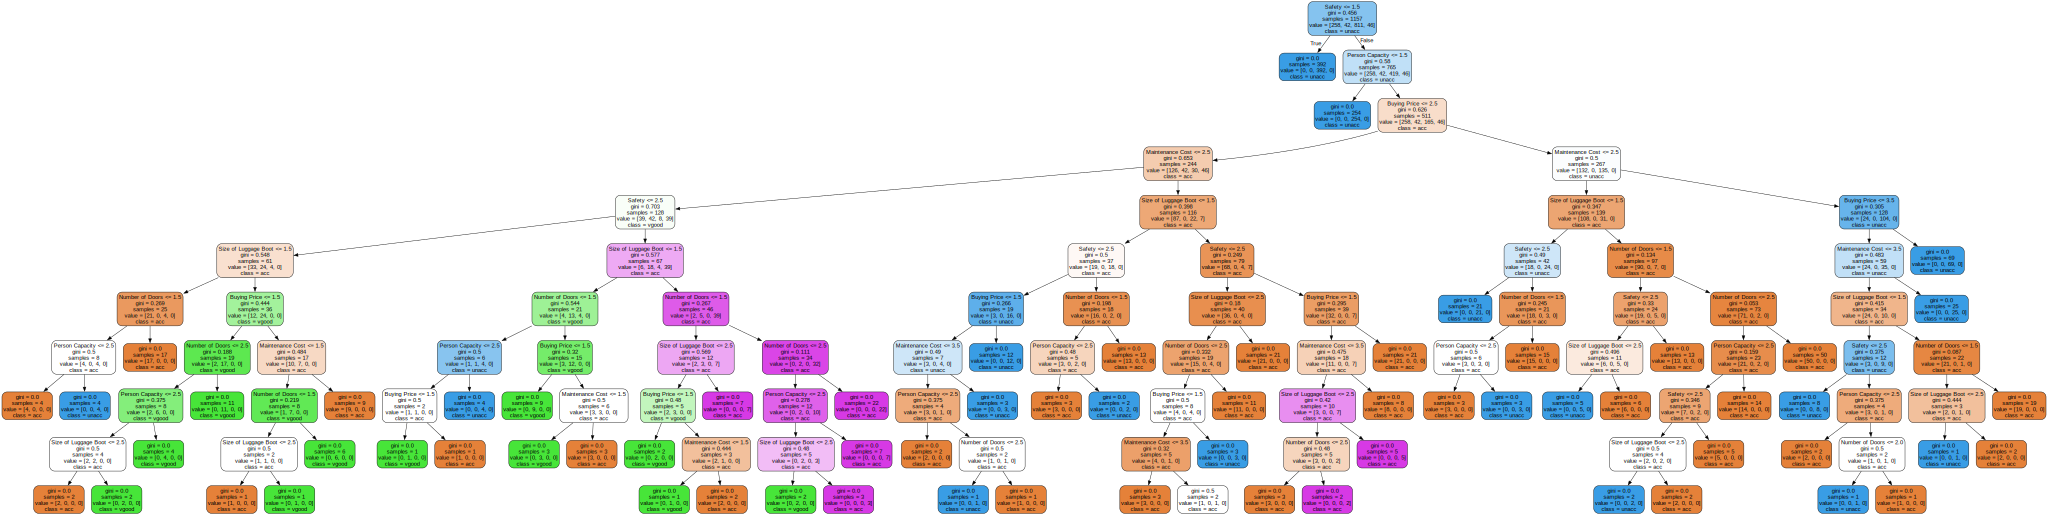

In [52]:
#Shows the Decision Tree classifier with criterion Gini impurity
from sklearn.tree import DecisionTreeClassifier
dct_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
dct_gini = dct_gini.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(dct_gini, out_file='tree.dot',
            feature_names=X_train.columns,  
            class_names=y_train,  
            filled=True, rounded=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Data Evaluation for Decision Tree Classifer with criterion Gini impurity

Scores for Training and Testing with varying Tree Depths (Gini impurity):
    LevelLimit  Score for Training  Score for Testing
1          1.0            0.700951           0.698774
2          2.0            0.781331           0.770578
3          3.0            0.783924           0.807356
4          4.0            0.853068           0.845884
5          5.0            0.884183           0.859895
6          6.0            0.942092           0.919440
7          7.0            0.952463           0.914186
8          8.0            0.980121           0.961471
9          9.0            0.988764           0.961471
10        10.0            0.999136           0.973730

Classification Report for criterion Gini impurity:
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94       126
        good       0.87      0.96      0.91        27
       unacc       0.99      0.99      0.99       399
       vgood       1.00      0.95      0.97        19

    accu

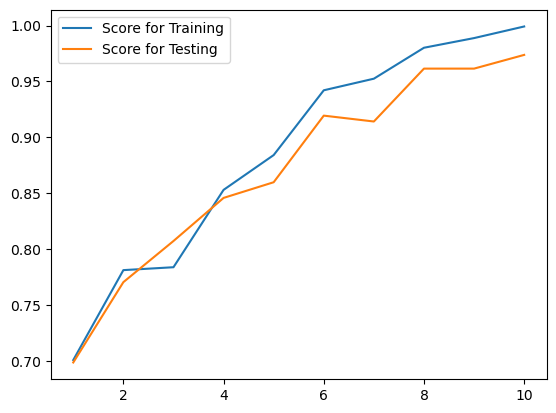

In [56]:
from sklearn.metrics import accuracy_score, classification_report

#To see if we are overtraining using 'gini'/Gini impurity
print("Scores for Training and Testing with varying Tree Depths (Gini impurity):")
resultsGini = pd.DataFrame(columns= ['LevelLimit', 'Score for Training', 'Score for Testing'])
for treeDepth in range (1,11):
    dct_gini = DecisionTreeClassifier(criterion='gini', max_depth=treeDepth, random_state=0)
    dct_gini = dct_gini.fit(X_train, y_train)
    dct_gini.predict(X_test)
    scoreTrain = dct_gini.score(X_train, y_train)
    scoreTest = dct_gini.score(X_test, y_test)
    resultsGini.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]
    
print(resultsGini.head(11))
resultsGini.pop('LevelLimit')
ax = resultsGini.plot()

y_pred_gini = dct_gini.predict(X_test)

#Displays classification report
print('\n'+"Classification Report for criterion Gini impurity:")
print(classification_report(y_test, y_pred_gini, zero_division=0))

#Displays the model score
y_pred_test_gini = dct_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_test_gini)
print("Model Score for Decision Tree Classifier (Gini impurity)")
print(accuracy_gini)